In [53]:
import pandas as pd
import numpy as np


In [54]:
data = pd.read_csv('Food_Delivery_Time_Prediction.csv')

In [55]:
data.sample(5)

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
101,ORD0102,"(19.11305, 87.619916)","(21.990214, 86.925957)",9.45,Cloudy,Medium,2,Low,Evening,Bike,3.8,4.0,91.33,751.69,98.37
173,ORD0174,"(14.643992, 87.6362)","(13.218537, 84.461725)",22.34,Rainy,Low,9,Low,Afternoon,Car,2.8,4.7,82.96,1486.04,1.47
62,ORD0063,"(13.690148, 80.640997)","(15.781756, 85.254477)",1.44,Cloudy,Low,3,Medium,Afternoon,Car,4.3,2.8,115.63,915.87,9.22
178,ORD0179,"(16.269274, 79.144391)","(16.964307, 86.495532)",9.31,Snowy,High,8,Low,Afternoon,Car,3.3,3.3,80.11,1848.91,89.12
189,ORD0190,"(14.418136, 81.056051)","(15.882562, 86.681126)",10.56,Rainy,Low,2,Low,Afternoon,Bike,3.6,3.4,105.41,1767.21,52.66


In [56]:
data=data.dropna()

In [57]:
data = data.drop(columns='Order_ID')

In [58]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [59]:
from sklearn.preprocessing import LabelEncoder

le_weather = LabelEncoder()
le_traffic = LabelEncoder()

data['Weather_Conditions'] = le_weather.fit_transform(data['Weather_Conditions'])
data['Traffic_Conditions'] = le_traffic.fit_transform(data['Traffic_Conditions'])


In [60]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [61]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [62]:
%pip install haversine

from haversine import haversine
data['distance_km'] = data.apply(lambda row: haversine(eval(row['Restaurant_Location']), 
                                                       eval(row['Customer_Location'])), axis=1)


Note: you may need to restart the kernel to use updated packages.


In [63]:
data['distance_km']

0       775.652269
1      1042.387037
2       476.221364
3       389.913167
4       806.507000
          ...     
195     670.131578
196     558.891974
197     106.686837
198     880.581309
199     763.582830
Name: distance_km, Length: 200, dtype: float64

In [64]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,distance_km
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,775.652269
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,1042.387037
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,476.221364
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,389.913167
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,806.507000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34,670.131578
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27,558.891974
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10,106.686837
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25,880.581309


In [65]:
data=data.drop(columns=['Order_Priority','Order_Time','Vehicle_Type'])

In [66]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,distance_km
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,4.1,3.0,26.22,1321.10,81.54,775.652269
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,4.5,4.2,62.61,152.21,29.02,1042.387037
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,3.3,3.4,48.43,1644.38,64.17,476.221364
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,3.2,3.7,111.63,541.25,79.23,389.913167
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,3.5,2.8,32.38,619.81,2.34,806.507000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,4.7,4.0,50.39,1432.26,66.34,670.131578
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,3.0,3.6,90.54,1720.25,40.27,558.891974
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,2.9,3.4,73.20,1356.58,5.10,106.686837
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,3.9,4.8,53.94,354.39,85.25,880.581309


In [67]:
x_scaled = data.drop(columns=['Customer_Location', 'Restaurant_Location'])

In [68]:
from sklearn.cluster import KMeans
inertias = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertias.append(kmeans.inertia_)


Text(0, 0.5, 'Inertia')

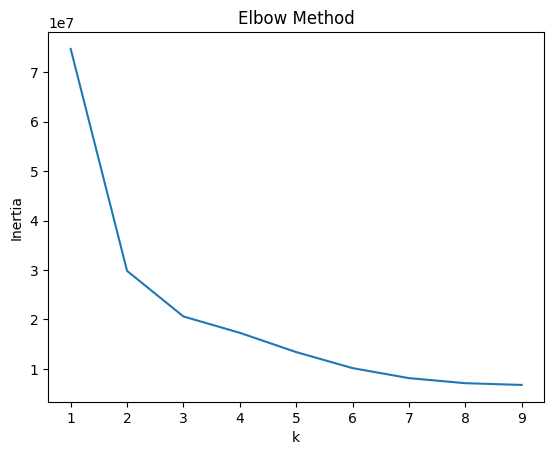

In [69]:
plt.plot(range(1, 10), inertias)
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [105.0, 105.0, 123.75, 123.75],
  [82.5, 82.5, 114.375, 114.375],
  [52.5, 52.5, 98.4375, 98.4375],
  [13.75, 13.75, 75.46875, 75.46875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [180.0, 180.0, 202.5, 202.5],
  [160.0, 160.0, 191.25, 191.25],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [250.0, 250.0, 272.5, 272.5],
  [230.0, 230.0, 261.25, 261.25],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 35

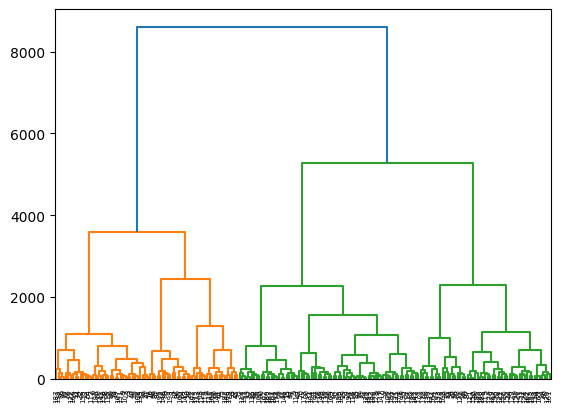

In [70]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(x_scaled, 'ward')
dendrogram(linked)


In [75]:
# Example: If delivery time ≤ 30 mins → Fast else Delayed
data['Delivery_Status'] = data['Delivery_Time'].apply(lambda x: 'Fast' if x <= 30 else 'Delayed')


In [76]:
data

,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,distance_km,Delivery_Status
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,1,2,4,4.1,3.0,26.22,1321.10,81.54,775.652269,Fast
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,0,2,8,4.5,4.2,62.61,152.21,29.02,1042.387037,Delayed
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,2,2,9,3.3,3.4,48.43,1644.38,64.17,476.221364,Delayed
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,0,1,2,3.2,3.7,111.63,541.25,79.23,389.913167,Delayed
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,1,0,6,3.5,2.8,32.38,619.81,2.34,806.507000,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,0,0,8,4.7,4.0,50.39,1432.26,66.34,670.131578,Delayed
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,2,2,8,3.0,3.6,90.54,1720.25,40.27,558.891974,Delayed
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,2,0,4,2.9,3.4,73.20,1356.58,5.10,106.686837,Delayed
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,1,0,9,3.9,4.8,53.94,354.39,85.25,880.581309,Delayed


In [77]:
data=data.drop(columns=['Customer_Location','Restaurant_Location'])


In [78]:
data

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,distance_km,Delivery_Status
0,1.57,1,2,4,4.1,3.0,26.22,1321.10,81.54,775.652269,Fast
1,21.32,0,2,8,4.5,4.2,62.61,152.21,29.02,1042.387037,Delayed
2,6.95,2,2,9,3.3,3.4,48.43,1644.38,64.17,476.221364,Delayed
3,13.79,0,1,2,3.2,3.7,111.63,541.25,79.23,389.913167,Delayed
4,6.72,1,0,6,3.5,2.8,32.38,619.81,2.34,806.507000,Delayed
...,...,...,...,...,...,...,...,...,...,...,...
195,23.82,0,0,8,4.7,4.0,50.39,1432.26,66.34,670.131578,Delayed
196,6.09,2,2,8,3.0,3.6,90.54,1720.25,40.27,558.891974,Delayed
197,20.61,2,0,4,2.9,3.4,73.20,1356.58,5.10,106.686837,Delayed
198,24.06,1,0,9,3.9,4.8,53.94,354.39,85.25,880.581309,Delayed


In [79]:
X=data.drop(columns='Delivery_Status')

In [80]:
y=data['Delivery_Status']

In [82]:
X

,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,distance_km
0,1.57,1,2,4,4.1,3.0,26.22,1321.10,81.54,775.652269
1,21.32,0,2,8,4.5,4.2,62.61,152.21,29.02,1042.387037
2,6.95,2,2,9,3.3,3.4,48.43,1644.38,64.17,476.221364
3,13.79,0,1,2,3.2,3.7,111.63,541.25,79.23,389.913167
4,6.72,1,0,6,3.5,2.8,32.38,619.81,2.34,806.507000
...,...,...,...,...,...,...,...,...,...,...
195,23.82,0,0,8,4.7,4.0,50.39,1432.26,66.34,670.131578
196,6.09,2,2,8,3.0,3.6,90.54,1720.25,40.27,558.891974
197,20.61,2,0,4,2.9,3.4,73.20,1356.58,5.10,106.686837
198,24.06,1,0,9,3.9,4.8,53.94,354.39,85.25,880.581309


In [83]:
y

0         Fast
1      Delayed
2      Delayed
3      Delayed
4      Delayed
        ...   
195    Delayed
196    Delayed
197    Delayed
198    Delayed
199    Delayed
Name: Delivery_Status, Length: 200, dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable y
label_encoder = LabelEncoder()
y_en = label_encoder.fit_transform(y)

# Scale the encoded target variable


In [89]:
y_en

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_en, test_size=0.2, random_state=42)

In [99]:
X_train

array([[ 1.86998428,  0.40226706, -1.41522074, ..., -0.02993207,
         1.293809  , -0.49639084],
       [ 1.33515672,  0.40226706, -1.41522074, ...,  0.56669169,
        -1.4175209 , -1.84433909],
       [-0.98291782,  1.31651039, -0.11086983, ..., -1.10236358,
        -1.42776392,  0.06684949],
       ...,
       [-1.35802975, -0.51197626, -0.11086983, ...,  0.32060061,
        -0.68855863, -0.08428812],
       [-0.91698017, -1.42621959, -0.11086983, ..., -0.0955393 ,
        -0.98048497,  1.72076231],
       [ 0.22447372, -1.42621959,  1.19348108, ...,  1.66352032,
         1.51232696, -0.89083413]])

In [100]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0])

In [101]:
X_test

array([[ 1.56080999,  1.31651039, -0.11086983, -1.55213929,  0.08769909,
         1.31378651,  0.6964993 ,  0.93305051, -0.23445099,  0.06576078],
       [ 1.35274009,  0.40226706,  1.19348108,  0.63911618, -0.05490106,
        -0.41204142, -0.68506968, -0.13494019, -0.00705574, -0.70057287],
       [ 1.84653978,  1.31651039, -1.41522074, -0.09130231, -1.76610284,
        -1.56259336,  0.58694165,  0.88171605,  0.27087179, -1.14537204],
       [ 0.38418935,  0.40226706, -1.41522074,  1.00432542,  1.08590013,
         0.73851053,  0.84504065,  1.56812485, -1.31816351, -0.48416404],
       [ 0.96297534,  1.31651039,  1.19348108, -1.55213929,  1.65630072,
        -0.41204142, -1.79845768,  0.22312179,  0.37364352, -0.65044944],
       [ 0.47796733,  1.31651039, -0.11086983, -0.8217208 , -1.48090254,
        -1.41877437, -0.22533084, -1.08447236,  0.25653155, -0.14168537],
       [-0.3748262 ,  1.31651039, -0.11086983, -1.18693005,  0.65809969,
        -0.26822242,  0.08116172, -1.00073633

In [102]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4125 - loss: 0.7832 - val_accuracy: 0.3750 - val_loss: 0.7574
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5010 - loss: 0.6868 - val_accuracy: 0.6562 - val_loss: 0.6633
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7375 - loss: 0.6055 - val_accuracy: 0.7812 - val_loss: 0.5883
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8281 - loss: 0.5691 - val_accuracy: 0.8125 - val_loss: 0.5329
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9042 - loss: 0.4718 - val_accuracy: 0.8750 - val_loss: 0.4883
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8656 - loss: 0.4728 - val_accuracy: 0.8750 - val_loss: 0.4543
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8719 - loss: 0.4207 - val_accuracy: 0.8750 - val_loss: 0.4280
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8958 - loss: 0.3630 - val_accuracy: 0.8750 - val_loss: 0.4065


In [105]:
y_pred = model.predict(X_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [107]:
y_pred_labels = (y_pred > 0.5).astype(int)


In [108]:
y_pred_labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [109]:
y_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [110]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_labels)
print("Model Accuracy:", acc)



Model Accuracy: 0.85
